In [58]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import datetime as dt
import seaborn as sns

In [29]:
steph_curry_raw = pd.read_csv('/Users/brendan/Desktop/Python/NBA_API/Steph_Curry.csv')
steph_curry_raw['DATE'] = pd.to_datetime(steph_curry_raw['DATE']).dt.date
steph_curry_raw.dropna(subset=['Season'], inplace=True)
steph_curry_raw['Season'] = steph_curry_raw['Season'].astype(int)

NBA_all_raw = pd.read_csv('/Users/brendan/Desktop/Python/NBA_API/NBA_all_2000.csv')
NBA_all_raw['DATE'] = pd.to_datetime(NBA_all_raw['DATE']).dt.date
NBA_all_raw.dropna(subset=['Season'], inplace=True)
NBA_all_raw['Season'] = NBA_all_raw['Season'].astype(int)


In [30]:
steph_curry_raw.isna().sum()

DATE                    0
AGE                     0
TEAM                    0
HOME/AWAY               0
OPPONENT                0
RESULT                  0
GS                      0
MP                      0
FG                      0
FGA                     0
FG%                     0
3P                      0
3PA                     0
3P%                     2
FT                      0
FTA                     0
FT%                    90
ORB                     0
DRB                     0
TRB                     0
AST                     0
STL                     0
BLK                     0
TOV                     0
PF                      0
PTS                     0
GAME_SCORE              0
+/-                     0
Player                  0
Years                   0
Days                    0
Season                  0
rank_FG                 0
quantile_FG             0
rank_FGA                0
quantile_FGA            0
rank_3P                 0
quantile_3P             0
rank_3PA    

In [31]:
NBA_all_raw.columns

Index(['DATE', 'AGE', 'TEAM', 'HOME/AWAY', 'OPPONENT', 'RESULT', 'GS', 'MP',
       'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GAME_SCORE',
       '+/-', 'Player', 'Years', 'Days', 'Season', 'rank_FG', 'quantile_FG',
       'rank_FGA', 'quantile_FGA', 'rank_3P', 'quantile_3P', 'rank_3PA',
       'quantile_3PA', 'rank_FT', 'quantile_FT', 'rank_FTA', 'quantile_FTA',
       'rank_ORB', 'quantile_ORB', 'rank_DRB', 'quantile_DRB', 'rank_TRB',
       'quantile_TRB', 'rank_AST', 'quantile_AST', 'rank_STL', 'quantile_STL',
       'rank_BLK', 'quantile_BLK', 'rank_PTS', 'quantile_PTS',
       'rank_GAME_SCORE', 'quantile_GAME_SCORE'],
      dtype='object')

In [32]:
steph_curry = steph_curry_raw[['DATE', 'Player', 'Season','GS','TEAM', 'OPPONENT', 'RESULT', 'MP', 'FG', 'FGA', 'FG%',
                              '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'TRB', 'AST', 'STL', 'BLK',
                              'TOV', 'PF', 'PTS', 'GAME_SCORE', '+/-']]
NBA_all = NBA_all_raw[['DATE', 'Player', 'Season','TEAM', 'OPPONENT', 'RESULT', 'MP', 'FG', 'FGA', 'FG%',
                              '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'TRB', 'AST', 'STL', 'BLK',
                              'TOV', 'PF', 'PTS', 'GAME_SCORE', '+/-']]

In [33]:
steph_curry.head()

,DATE,Player,Season,GS,TEAM,OPPONENT,RESULT,MP,FG,FGA,...,FT%,TRB,AST,STL,BLK,TOV,PF,PTS,GAME_SCORE,+/-
0,2009-10-28,Stephen Curry,2010,1,GSW,HOU,L (-1),35:39,7,12,...,NaN,2,7,4,0,2,2,14,15.5,7
1,2009-10-30,Stephen Curry,2010,1,GSW,PHO,L (-22),39:05,5,9,...,NaN,2,4,1,0,3,5,12,7.1,-19
2,2009-11-04,Stephen Curry,2010,1,GSW,MEM,W (+8),28:27,3,6,...,NaN,5,9,2,0,1,4,7,11.2,-4
3,2009-11-06,Stephen Curry,2010,1,GSW,LAC,L (-28),21:32,1,5,...,0.75,1,3,0,0,0,6,5,1.5,-13
4,2009-11-08,Stephen Curry,2010,1,GSW,SAC,L (-13),31:15,4,8,...,0.00,4,6,0,0,5,4,9,3.4,-5


In [34]:
steph_3pt_season = steph_curry.groupby('Season')[['3P', '3PA', '3P%']].mean().round(2)

In [35]:
NBA_3pt_season = NBA_all.groupby('Season')[['3P', '3PA', '3P%']].mean().round(2)

In [36]:
## Plotting time
NBA_all_raw.isna().sum()

DATE                       0
AGE                        0
TEAM                       0
HOME/AWAY                  0
OPPONENT                   0
RESULT                     0
GS                         0
MP                         0
FG                         0
FGA                        0
FG%                      841
3P                         0
3PA                        0
3P%                    70538
FT                         0
FTA                        0
FT%                    55658
ORB                        0
DRB                        0
TRB                        0
AST                        0
STL                        0
BLK                        0
TOV                        0
PF                         0
PTS                        0
GAME_SCORE                 0
+/-                        0
Player                     0
Years                      0
Days                       0
Season                     0
rank_FG                    0
quantile_FG                0
rank_FGA      

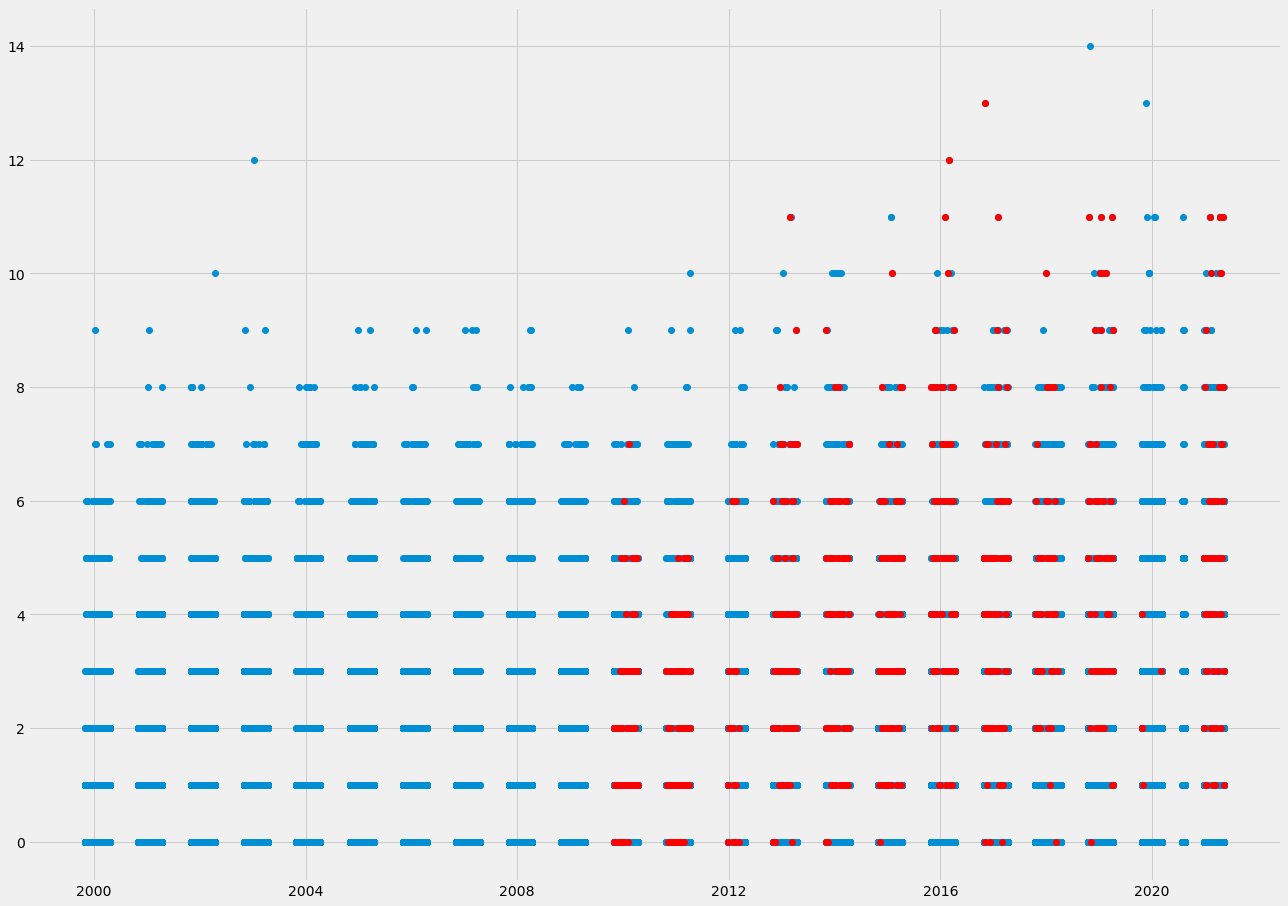

In [37]:
fig, ax = plt.subplots(figsize=(20,15))
x = NBA_all_raw['DATE']
y = NBA_all_raw['3P']
x1 = steph_curry_raw['DATE']
y1 = steph_curry_raw['3P']
plt.plot_date(x, y)
plt.plot_date(x1,y1,c='red')

plt.show()

In [38]:
steph_3pt_season.head()

,3P,3PA,3P%
Season,,,
2010,2.11,4.87,0.41
2011,2.04,4.63,0.43
2012,2.26,5.04,0.40
2013,3.48,7.65,0.44
2014,3.36,7.92,0.42


In [42]:
steph_curry['3P Total'] = steph_curry.groupby(['Season'])['3P'].cumsum()
steph_curry['Game #'] = steph_curry.groupby(['Season'])['GS'].cumsum()

<ipython-input-42-371a425a2770>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  steph_curry['3P Total'] = steph_curry.groupby(['Season'])['3P'].cumsum()
<ipython-input-42-371a425a2770>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  steph_curry['Game #'] = steph_curry.groupby(['Season'])['GS'].cumsum()


In [43]:
steph_curry.tail()

,DATE,Player,Season,GS,TEAM,OPPONENT,RESULT,MP,FG,FGA,...,AST,STL,BLK,TOV,PF,PTS,GAME_SCORE,+/-,3P Total,Game #
748,2021-05-04,Stephen Curry,2021,1,GSW,NOP,L (-5),37:06,13,31,...,2,3,0,4,2,37,23.6,-9,305,57
749,2021-05-06,Stephen Curry,2021,1,GSW,OKC,W (+21),31:21,11,21,...,7,1,0,3,2,34,26.6,24,311,58
750,2021-05-08,Stephen Curry,2021,1,GSW,OKC,W (+39),29:20,14,26,...,2,1,0,1,2,49,38.5,31,322,59
751,2021-05-10,Stephen Curry,2021,1,GSW,UTA,W (+3),36:55,11,25,...,6,2,0,3,1,36,26.9,4,325,60
752,2021-05-11,Stephen Curry,2021,1,GSW,PHO,W (+6),36:31,7,22,...,6,1,0,3,2,21,10.7,6,326,61


In [52]:
steph_curry_plot = steph_curry[['DATE', 'Player', 'Season', 'GS', '3P', '3PA', '3P Total', 'Game #']]
steph_curry_plot.tail()

,DATE,Player,Season,GS,3P,3PA,3P Total,Game #
748,2021-05-04,Stephen Curry,2021,1,8,20,305,57
749,2021-05-06,Stephen Curry,2021,1,6,13,311,58
750,2021-05-08,Stephen Curry,2021,1,11,21,322,59
751,2021-05-10,Stephen Curry,2021,1,3,13,325,60
752,2021-05-11,Stephen Curry,2021,1,1,11,326,61


In [101]:
steph_curry_plot.groupby('Season')[['GS', '3P']].sum()

,GS,3P
Season,,
2010,76,160
2011,73,149
2012,23,52
2013,77,268
2014,77,259
2015,78,282
2016,77,387
2017,78,321
2018,50,209


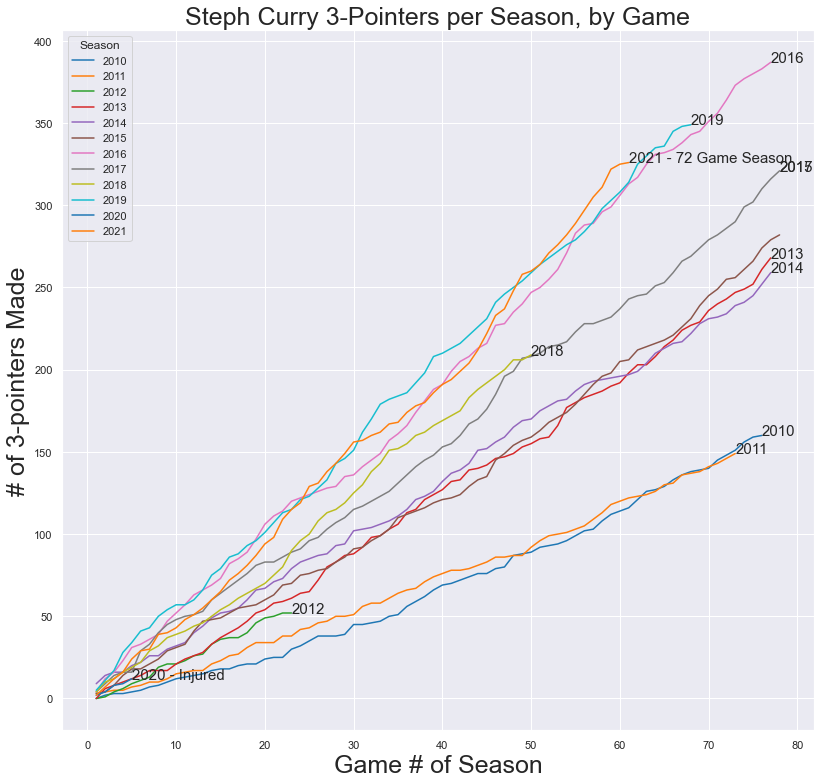

In [115]:
fig, ax = plt.subplots(figsize=(12,12))
# Line Plot
sns.lineplot(x='Game #', y='3P Total', data=steph_curry_plot, hue='Season', palette = 'tab10')

# move the legend outside of the axes
#ax.legend(bbox_to_anchor=(1, 1), loc='upper left')

# annotate
size=15
plt.annotate(xy=[76,160], text='2010', fontsize=size)
plt.annotate(xy=[73,149], text='2011', fontsize=size)
plt.annotate(xy=[23,52], text='2012', fontsize=size)
plt.annotate(xy=[77,268], text='2013', fontsize=size)
plt.annotate(xy=[77,259], text='2014', fontsize=size)
plt.annotate(xy=[78,321], text='2015', fontsize=size)
plt.annotate(xy=[77,387], text='2016', fontsize=size)
plt.annotate(xy=[78,321], text='2017', fontsize=size)
plt.annotate(xy=[50,209], text='2018', fontsize=size)
plt.annotate(xy=[68,349], text='2019', fontsize=size)
plt.annotate(xy=[5,12], text='2020 - Injured', fontsize=size)
plt.annotate(xy=[61,326], text='2021 - 72 Game Season', fontsize=size)


# final styling
ax.set_xlabel('Game # of Season',fontsize=25)
ax.set_ylabel('# of 3-pointers Made',fontsize=25)
ax.set_title('Steph Curry 3-Pointers per Season, by Game',fontsize=25)
plt.savefig('Steph_3P.png')
plt.show()


No handles with labels found to put in legend.


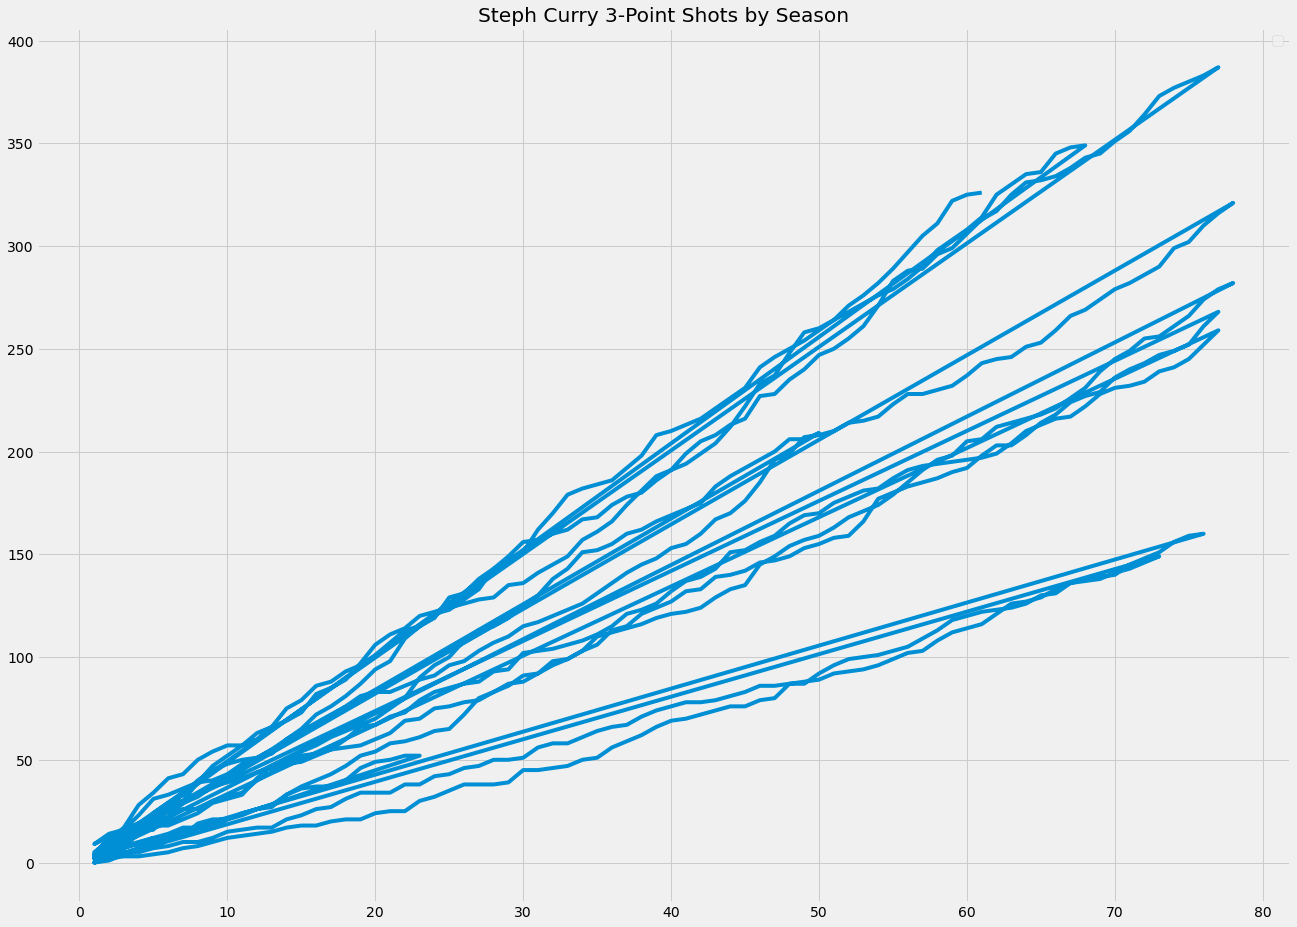

In [49]:
fig, ax = plt.subplots(figsize=(20,15))

x1 = steph_curry['Game #']
y1 = steph_curry['3P Total']

plt.title('Steph Curry 3-Point Shots by Season')
plt.legend()
plt.plot(x1, y1)
plt.show()